## EXPERIMENT 1.1: AdaFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.stats_tables import *


from IPython import embed


### AdaFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

In [2]:
feature_list_children = '../../data/data_full/feature_vectors/adaface_feature_vectors/similarity_scores_children_full_baseline1.pt'
feature_list_adults = '../../data/data_full/feature_vectors/adaface_feature_vectors/similarity_scores_adults_bibel_cropped_resized_retina_baseline1.pt'


image_names_c, ids_c, num_ids_c, norm_feats_c = load_adaface_vectors(feature_list_children)
image_names_a, ids_a, num_ids_a, norm_feats_a = load_adaface_vectors(feature_list_adults)
# image_names_a, ids_a, num_ids_a, norm_feats_a = load_adaface_vectors_adults(feature_list_adults) # virker for den gamle, men ikke de cropped af en eller anden grund

ids_a = ["_".join(x.split("_")[1:]) for x in ids_a]


# Similarity matrices from adaface - all
sim_mat_c = np.dot(norm_feats_c, norm_feats_c.T)
sim_mat_a = np.dot(norm_feats_a, norm_feats_a.T)


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

In [3]:
her = 2
image_names_a[her], ids_a[her], num_ids_a[her]

('m.012mmb_0001', 'm.012mmb', 2)

In [4]:
print(f'Amount of images in children: {len(ids_c)}\nAmount of unique ids in children: {len(np.unique(ids_c))}')

Amount of images in children: 9927
Amount of unique ids in children: 3465


In [5]:
print(f'Amount of images in adults: {len(ids_a)}\nAmount of unique ids in adults: {len(np.unique(ids_a))}')

Amount of images in adults: 10545
Amount of unique ids in adults: 5139


In [6]:
print(f'Amount of images in children: {len(children_all)}\nAmount of unique ids in children: {len(children_all.Identity.unique())}')
print(f'Amount of images in adults: {len(adults_all)}\nAmount of unique ids in adults: {len(adults_all.Identity.unique())}')

Amount of images in children: 7817
Amount of unique ids in children: 2739
Amount of images in adults: 10545
Amount of unique ids in adults: 5139


In [21]:
# import numpy as np
# from collections import Counter

# # Given array
# array = num_ids_c


# # Count occurrences of each unique ID
# frequency_counts = Counter(array)

# # Get the frequencies sorted in descending order
# sorted_frequencies = sorted(frequency_counts.values(), reverse=True)

# # Select the top 10 frequencies (or as many as are available)
# top_10_frequencies = sorted_frequencies[:1000]

# # Calculate the mean of the top 10 frequencies
# mean_top_10_frequencies = np.mean(top_10_frequencies)
# mean_top_10_frequencies


5.09

# Finding the right threshold

In [4]:
random_states = [1,2]
percentiles = np.arange(0.1, 1, 0.008).tolist()

df_all_threshold_x = compute_metrics_ex_1_1(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


FPD result:  0.0
FND result:  0.3726071384463382
GARBE result, GARBE close to 1 means more unfair:  0.2794553538347536
Done for random_state: 1, percentile: 0.1
FPD result:  0.0
FND result:  0.232612696684553
GARBE result, GARBE close to 1 means more unfair:  0.17445952251341476
Done for random_state: 1, percentile: 0.10800000000000001
FPD result:  0.0
FND result:  0.232612696684553
GARBE result, GARBE close to 1 means more unfair:  0.17445952251341476
Done for random_state: 1, percentile: 0.11600000000000002
FPD result:  0.0
FND result:  0.1941647375443318
GARBE result, GARBE close to 1 means more unfair:  0.14562355315824885
Done for random_state: 1, percentile: 0.12400000000000003
FPD result:  0.0
FND result:  0.20156345629555447
GARBE result, GARBE close to 1 means more unfair:  0.15117259222166585
Done for random_state: 1, percentile: 0.13200000000000003
FPD result:  0.0
FND result:  0.20156345629555447
GARBE result, GARBE close to 1 means more unfair:  0.15117259222166585
Done fo

In [4]:

# random_states = [4, 5, 6]
# percentiles = [70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]

# df_all_threshold_x = compute_metrics_ex_1_1(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


In [7]:
def plot_threshold_metrics_ex_1_1(df_all_threshold_x):
    # Set the aesthetics for the plots
    sns.set(style="whitegrid")

    plot_df = df_all_threshold_x.groupby('Threshold').mean()

    plt.figure(figsize=(14, 7))

    # Plot FNIR
    # plt.subplot(1, 2, 1)
    plt.plot(plot_df.index, plot_df['FNIR_c'], 'r-', label='Children - FNIR')
    plt.plot(plot_df.index, plot_df['FNIR_a'], 'c-', label='Adults - FNIR')
    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FNIR and FPIR', fontsize=14)
    plt.title('FNIR vs Threshold', fontsize=16)
    # plt.ylim(0.0, 0.125)  # Limit the FNIR y-axis
    plt.xlim(0.0, 1)
    plt.legend(fontsize=16)
    plt.grid(True)

    # Plot FPIR
    # plt.subplot(1, 2, 2)
    plt.plot(plot_df.index, plot_df['FPIR_c'], 'g-', label='Children - FPIR')
    plt.plot(plot_df.index, plot_df['FPIR_a'], 'b-', label='Adults - FPIR')
    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FPIR and FNIR', fontsize=14)
    plt.title('FPIR and FNIR vs Threshold - AdaFace', fontsize=16)
    # plt.ylim(0.85, 1.0)  # Limit the FPIR y-axis
    plt.xlim(0.0, 1)
    plt.legend(fontsize=16)
    plt.grid(True)

    plt.tight_layout()

    # Show the plot
    plt.show()
# plot_threshold_metrics_ex_1_2(df_all_threshold_x)

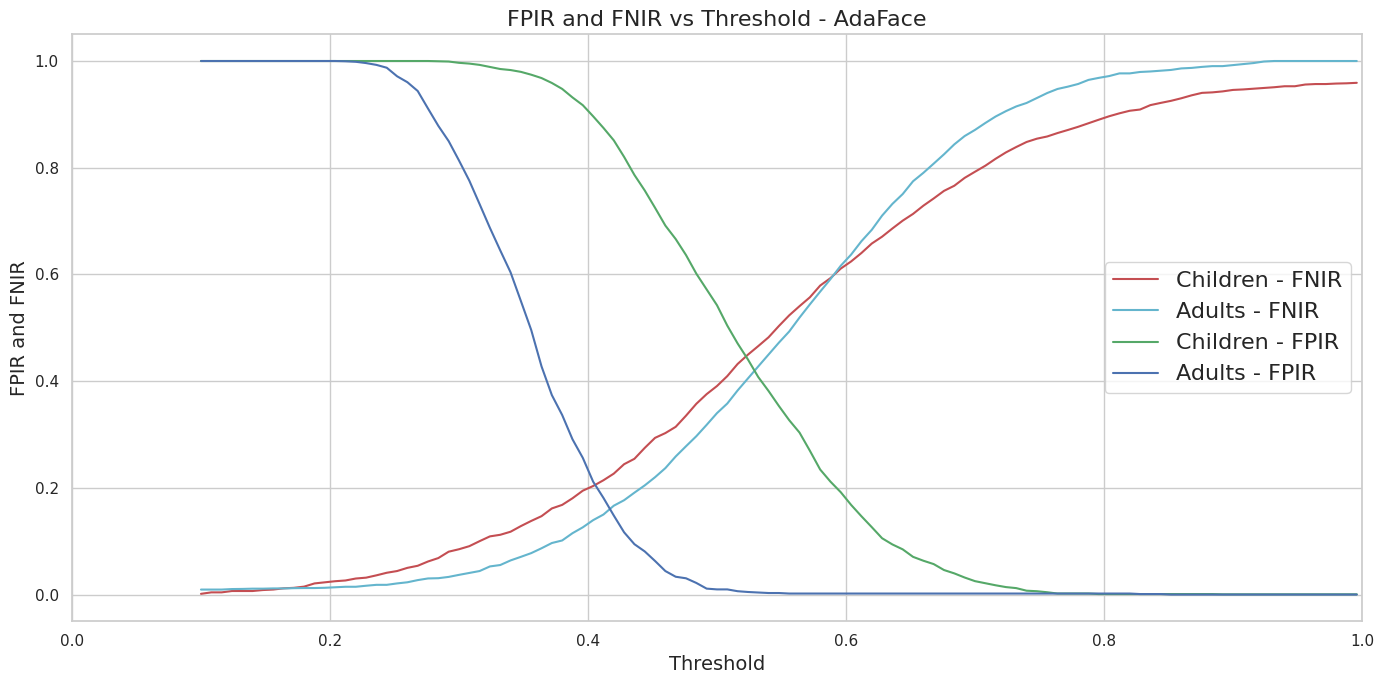

In [8]:

plot_threshold_metrics_ex_1_1(df_all_threshold_x)

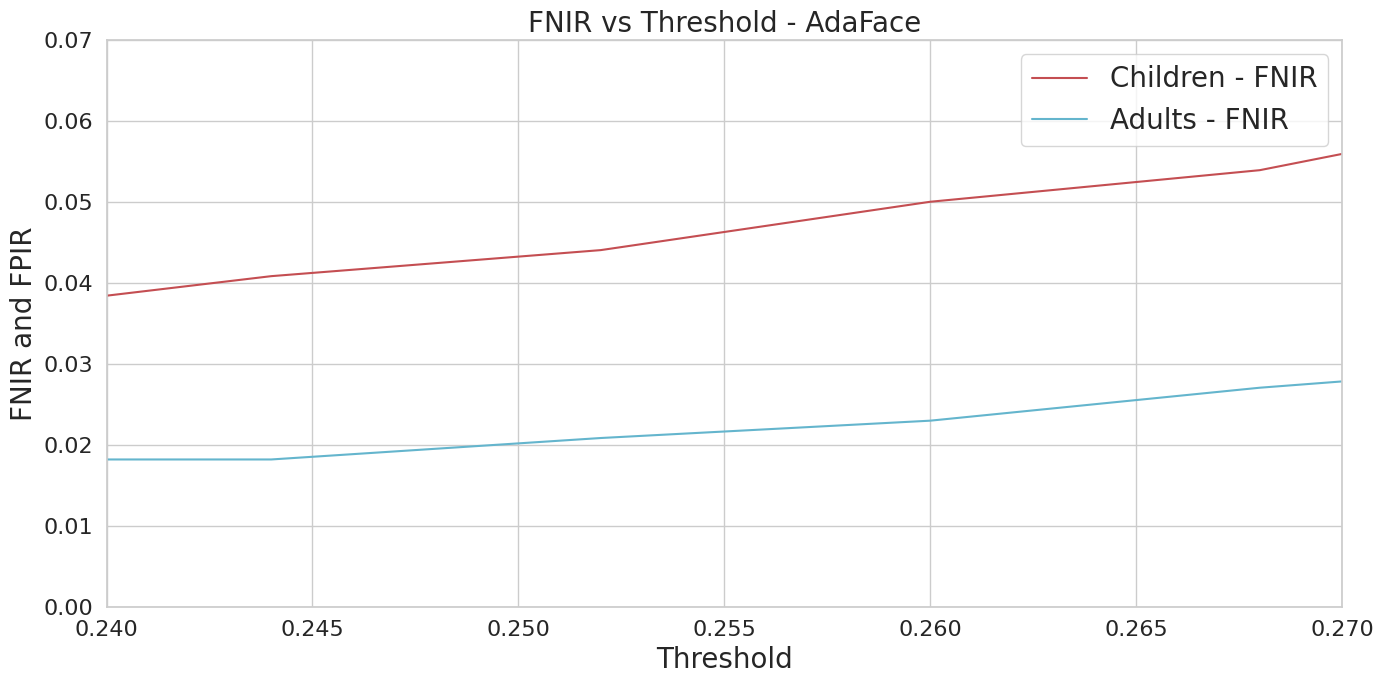

In [11]:
def plot_threshold_metrics_ex_1_1_zoomed(df_all_threshold_x):
    # Set the aesthetics for the plots
    sns.set(style="whitegrid")

    plot_df = df_all_threshold_x.groupby('Threshold').mean()

    plt.figure(figsize=(14, 7))
    plt.plot(plot_df.index, plot_df['FNIR_c'], 'r-', label='Children - FNIR')
    plt.plot(plot_df.index, plot_df['FNIR_a'], 'c-', label='Adults - FNIR')
    plt.xlabel('Threshold', fontsize=20)
    plt.ylabel('FNIR and FPIR', fontsize=20)
    plt.title('FNIR vs Threshold - AdaFace', fontsize=20)
    plt.ylim(0.0, 0.07)  # Limit the FNIR y-axis
    plt.xlim(0.24, 0.27)
    plt.legend(fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)

    plt.tight_layout()

    # Show the plot
    plt.show()
plot_threshold_metrics_ex_1_1_zoomed(df_all_threshold_x)

### then the threshold should be based on the childrens and that would be 26

# Stats

In [5]:

random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results, sim_mat_dict_all_magface_ex1_1 = evaluate_metrics_ex_1_1(
    random_states, children_all, adults_all, image_names_c, image_names_a,
    sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, 0.26
)

df_all_results.describe().applymap(lambda x: f"{x:.3f}")

FPD result:  0.21905378820021723
FND result:  0.17577558037033977
GARBE result, GARBE close to 1 means more unfair:  0.18659513232780914
done
FPD result:  0.342143017860971
FND result:  0.1970570362010591
GARBE result, GARBE close to 1 means more unfair:  0.2333285316160371
done
FPD result:  0.2216541272217817
FND result:  0.18375535644721466
GARBE result, GARBE close to 1 means more unfair:  0.19323004914085642
done
FPD result:  0.24930060440515306
FND result:  0.17164723500114307
GARBE result, GARBE close to 1 means more unfair:  0.19106057735214554
done
FPD result:  0.19737038744566365
FND result:  0.21493952271984312
GARBE result, GARBE close to 1 means more unfair:  0.21054723890129823
done
FPD result:  0.28464755858378626
FND result:  0.13949000986347443
GARBE result, GARBE close to 1 means more unfair:  0.1757793970435524
done
FPD result:  0.26987231693173125
FND result:  0.15673297981907638
GARBE result, GARBE close to 1 means more unfair:  0.1850178140972401
done
FPD result:  

/tmp/ipykernel_43742/3751090618.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_c,FNIR_a,FPIR_c,FPIR_a,FPD,FND,GARBE,Threshold
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,5.500,0.049,0.021,1.000,0.962,0.276,0.197,0.216,0.260
std,3.028,0.005,0.005,0.000,0.006,0.053,0.041,0.038,0.000
min,1.000,0.043,0.015,1.000,0.955,0.197,0.139,0.176,0.260
25%,3.250,0.044,0.019,1.000,0.956,0.229,0.173,0.188,0.260
50%,5.500,0.049,0.021,1.000,0.961,0.277,0.190,0.202,0.260
75%,7.750,0.052,0.026,1.000,0.964,0.318,0.212,0.234,0.260
max,10.000,0.057,0.028,1.000,0.972,0.347,0.271,0.290,0.260


In [6]:
df_all_results.applymap(lambda x: f"{x:.3f}")

/tmp/ipykernel_43742/2398388374.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results.applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_c,FNIR_a,FPIR_c,FPIR_a,FPD,FND,GARBE,Threshold
0,1.000,0.057,0.027,1.000,0.963,0.219,0.176,0.187,0.260
1,2.000,0.044,0.019,1.000,0.957,0.342,0.197,0.233,0.260
2,3.000,0.043,0.020,1.000,0.972,0.222,0.184,0.193,0.260
3,4.000,0.055,0.027,1.000,0.959,0.249,0.172,0.191,0.260
4,5.000,0.053,0.021,1.000,0.971,0.197,0.215,0.211,0.260
5,6.000,0.050,0.028,1.000,0.956,0.285,0.139,0.176,0.260
6,7.000,0.043,0.023,1.000,0.964,0.270,0.157,0.185,0.260
7,8.000,0.050,0.015,1.000,0.955,0.347,0.271,0.290,0.260
8,9.000,0.045,0.015,1.000,0.964,0.301,0.251,0.264,0.260
9,10.000,0.049,0.020,1.000,0.955,0.323,0.205,0.235,0.260


In [7]:
df_all_results.describe().applymap(lambda x: f"{x:.3f}")


/tmp/ipykernel_43742/1142005554.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_results.describe().applymap(lambda x: f"{x:.3f}")


,Iteration,FNIR_c,FNIR_a,FPIR_c,FPIR_a,FPD,FND,GARBE,Threshold
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,5.500,0.049,0.021,1.000,0.962,0.276,0.197,0.216,0.260
std,3.028,0.005,0.005,0.000,0.006,0.053,0.041,0.038,0.000
min,1.000,0.043,0.015,1.000,0.955,0.197,0.139,0.176,0.260
25%,3.250,0.044,0.019,1.000,0.956,0.229,0.173,0.188,0.260
50%,5.500,0.049,0.021,1.000,0.961,0.277,0.190,0.202,0.260
75%,7.750,0.052,0.026,1.000,0.964,0.318,0.212,0.234,0.260
max,10.000,0.057,0.028,1.000,0.972,0.347,0.271,0.290,0.260


# Gemmer simscores

In [8]:

sim_mat_c_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_c_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# Concatenate all arrays into one big array
sim_mat_c_enrolled_iterations_all = np.concatenate(sim_mat_c_enrolled_iterations)
sim_mat_c_enrolled_iterations_all = pd.DataFrame(sim_mat_c_enrolled_iterations_all)
sim_mat_c_enrolled_iterations_all.to_csv('sim_mat_c_enrolled_iterations_all_ada.csv', index=False)
# Print the big array
print(len(sim_mat_c_enrolled_iterations_all))

sim_mat_a_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_a_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# Concatenate all arrays into one big array
sim_mat_a_enrolled_iterations_all = np.concatenate(sim_mat_a_enrolled_iterations)
sim_mat_a_enrolled_iterations_all = pd.DataFrame(sim_mat_a_enrolled_iterations_all)
sim_mat_a_enrolled_iterations_all.to_csv('sim_mat_a_enrolled_iterations_all_ada.csv', index=False)


# Print the big array
print(len(sim_mat_a_enrolled_iterations_all))


141482
41438


In [9]:

sim_mat_c_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_c_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_c_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

sim_mat_c_non_enrolled_iterations_all = np.concatenate(sim_mat_c_non_enrolled_iterations)
sim_mat_c_non_enrolled_iterations_all = pd.DataFrame(sim_mat_c_non_enrolled_iterations_all)
sim_mat_c_non_enrolled_iterations_all.to_csv('sim_mat_c_non_enrolled_iterations_all_ada.csv', index=False)
# Print the big array
print(len(sim_mat_c_non_enrolled_iterations_all))


sim_mat_a_non_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(1, 11):
    key = f'sim_mat_a_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_a_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

sim_mat_a_non_enrolled_iterations_all = np.concatenate(sim_mat_a_non_enrolled_iterations)
sim_mat_a_non_enrolled_iterations_all = pd.DataFrame(sim_mat_a_non_enrolled_iterations_all)
sim_mat_a_non_enrolled_iterations_all.to_csv('sim_mat_a_non_enrolled_iterations_all_ada.csv', index=False)

# Print the big array
print(len(sim_mat_a_non_enrolled_iterations_all))


32751054
32371232


# Loader sim scores

In [10]:
sim_mat_c_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_enrolled_iterations_all_ada.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_enrolled_iterations_all_ada.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all_ada.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all_ada = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all_ada.csv')).values.flatten()


In [11]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [12]:
mated_scores1 = sim_mat_a_enrolled_iterations_all_ada
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all_ada
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,41438.000000,3.237123e+07
1,Minimum,-0.127076,-4.138602e-01
2,Maximum,0.952069,8.744552e-01
3,Mean,0.585216,1.417561e-02
4,St. Dev.,0.135483,8.720514e-02
5,Skewness,-0.537410,3.281414e-01
6,Ex. Kurtosis,1.495607,4.662831e-01


In [13]:
mated_scores2 = sim_mat_c_enrolled_iterations_all_ada
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all_ada
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

,Statistic,Mated,Non-mated
0,Observations,141482.000000,3.275105e+07
1,Minimum,0.030712,-3.204173e-01
2,Maximum,0.998967,9.998881e-01
3,Mean,0.572877,1.315970e-01
4,St. Dev.,0.156216,1.199958e-01
5,Skewness,-0.241955,3.998172e-01
6,Ex. Kurtosis,-0.089465,1.713026e-01


In [6]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 12
label_fontsize = 16

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

In [34]:

# import matplotlib.pyplot as plt
# import numpy as np

# def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None, title="Histogram"):
#     def normalise_scores(distribution):
#         return np.ones_like(distribution) / len(distribution)

#     mated_mean = np.mean(mated_scores)

#     plt.figure(figsize=(10, 6))  # Replace 'figure_size' with a specific size if not defined

#     if normalise:
#         plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color='green', alpha=0.5, label='Mated Scores')  # Replace 'mated_label' with 'Mated Scores'
#         plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color='red', alpha=0.5, label='Non-mated Scores')  # Replace 'nonmated_label' with 'Non-mated Scores'
#         ylabel = "Probability Density"
#     else:
#         plt.hist(mated_scores, bins=50, color='green', alpha=0.5, label='Mated Scores')
#         plt.hist(nonmated_scores, bins=30, color='red', alpha=0.5, label='Non-mated Scores')
#         ylabel = "Count"

#     plt.axvline(mated_mean, color='darkgreen', linestyle='--', linewidth=2, label=f'Mated Mean: {mated_mean:.2f}')

#     plt.xlabel("Comparison Score", size=16)
#     plt.ylabel(ylabel, size=16)
#     plt.title(title, size=20)
#     plt.grid(True)
#     plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=14)  # Adjust legend parameters as needed

#     if savename is not None:
#         plt.savefig(savename, bbox_inches="tight")
#         plt.cla()
#         plt.clf()
#         plt.close()
#     else:
#         plt.show()


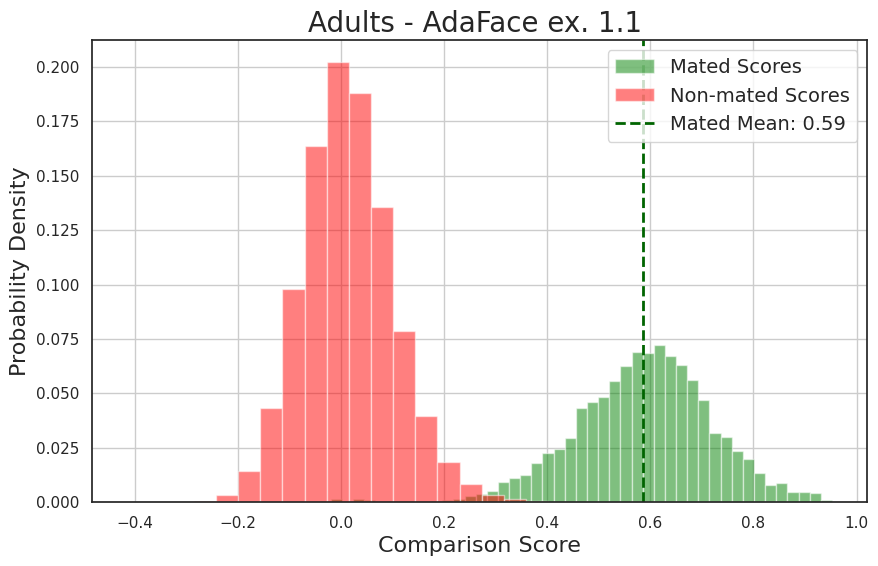

In [35]:

plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - AdaFace ex. 1.1 ')


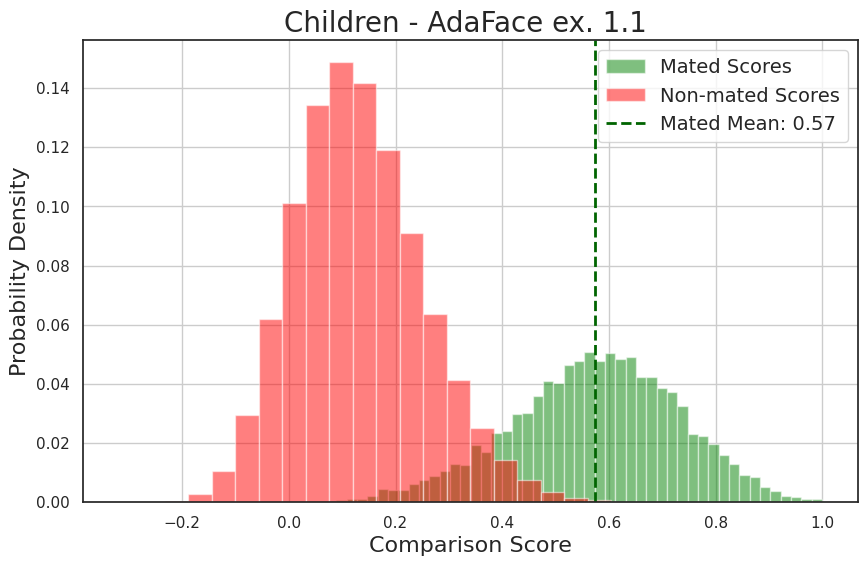

In [36]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - AdaFace ex. 1.1 ')


# DET curves


In [8]:
from DET_utils.DET_plots import *

In [ ]:
# mated_kde, mated_pos, mated_min, mated_max = get_kde(mated_scores1)
# nonmated_kde, nonmated_pos, nonmated_min, nonmated_max = get_kde(nonmated_scores1)
# plt.figure(figsize=figure_size)
# plt.plot(mated_pos, mated_kde(mated_pos), linewidth=linewidth, color=mated_colour, label=mated_label)
# plt.plot(nonmated_pos, nonmated_kde(nonmated_pos), linewidth=linewidth, color=nonmated_colour, label=nonmated_label)
# plt.xlabel("Score", size=label_fontsize)
# plt.ylabel("Probability Density", size=label_fontsize)
# plt.grid(True)
# plt.legend(loc=legend_loc, bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize)
# plt.show()

In [29]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))

# d_prime_system3 = d_prime(mated_scores3, nonmated_scores3)
# print("d' canonical =", round(d_prime_system3, round_digits))


d' child = 5.01223
d' adult = 3.16811


In [12]:
# figure_size = (12,7)
# alpha_shade = 0.25
# alpha_fill = 1.0
# linewidth = 2
# legend_loc = "upper left"
# legend_anchor = (1.0, 1.02)
# legend_cols = 1
# legend_fontsize = 18
# label_fontsize = 18
# tick_fontsize = 18

# def kde_with_threshold(mated_scores, nonmated_scores, scores_type, threshold, savename=None):
#     linspace_items = 101
#     mated_kde, mated_pos, mated_min, mated_max = get_kde(mated_scores, linspace_items)
#     nonmated_kde, nonmated_pos, nonmated_min, nonmated_max = get_kde(nonmated_scores, linspace_items)

#     plt.figure(figsize=figure_size)
#     plt.xlabel("Comparison Score", size=label_fontsize)
#     plt.ylabel("Probability Density", size=label_fontsize)

#     def compute_fills(scores_type, mated_min, mated_max, nonmated_min, nonmated_max, linspace_items):
#         if scores_type == "similarity":
#             if mated_min < threshold:
#                 mated_shade = np.linspace(threshold, mated_max, linspace_items)
#                 mated_fill = np.linspace(mated_min, threshold, linspace_items)
#             else:
#                 mated_shade = np.linspace(mated_min, mated_max, linspace_items)
#                 mated_fill = None
#             if nonmated_max > threshold:
#                 nonmated_shade = np.linspace(nonmated_min, threshold, linspace_items)
#                 nonmated_fill = np.linspace(threshold, nonmated_max, linspace_items)
#             else:
#                 nonmated_shade = np.linspace(nonmated_min, nonmated_max, linspace_items)
#                 nonmated_fill = None
#         elif scores_type == "dissimilarity":
#             if mated_max > threshold:
#                 mated_shade = np.linspace(mated_min, threshold, linspace_items)
#                 mated_fill = np.linspace(threshold, mated_max, linspace_items)
#             else:
#                 mated_shade = np.linspace(mated_min, mated_max, linspace_items)
#                 mated_fill = None
#             if nonmated_min < threshold:
#                 nonmated_shade = np.linspace(threshold, nonmated_max, linspace_items)
#                 nonmated_fill = np.linspace(nonmated_min, threshold, linspace_items)
#             else:
#                 nonmated_shade = np.linspace(nonmated_min, nonmated_max, linspace_items)
#                 nonmated_fill = None
#         else:
#             raise ValueError(f"Unknown type of comparison scores: {scores_type}")
#         return mated_shade, mated_fill, nonmated_shade, nonmated_fill

#     plt.plot(mated_pos, mated_kde(mated_pos), linewidth=linewidth, color=mated_colour, label=mated_label)
#     plt.plot(nonmated_pos, nonmated_kde(nonmated_pos), linewidth=linewidth, color=nonmated_colour, label=nonmated_label)

#     mated_shade, mated_fill, nonmated_shade, nonmated_fill = compute_fills(scores_type, mated_min, mated_max, nonmated_min, nonmated_max, linspace_items)

#     plt.fill_between(mated_shade, mated_kde(mated_shade), alpha=alpha_shade, color=mated_colour)
#     plt.fill_between(nonmated_shade, nonmated_kde(nonmated_shade), alpha=alpha_shade, color=nonmated_colour)

#     if mated_fill is not None:
#         plt.fill_between(mated_fill, mated_kde(mated_fill), alpha=alpha_fill, color=mated_colour)
#     if nonmated_fill is not None:
#         plt.fill_between(nonmated_fill, nonmated_kde(nonmated_fill), alpha=alpha_fill, color=nonmated_colour)

#     plt.axvline(threshold, linewidth=linewidth, linestyle=threshold_style, color=threshold_colour, label="Decision th")

#     plt.legend(loc=0)
#     red_patch = mpatches.Patch(color=nonmated_colour, alpha=alpha_fill, label='False positives')
#     green_patch = mpatches.Patch(color=mated_colour, alpha=alpha_fill, label='False negatives')
#     shaded_red_patch = mpatches.Patch(color=nonmated_colour, alpha=alpha_shade, label='True negatives')
#     shaded_green_patch = mpatches.Patch(color=mated_colour, alpha=alpha_shade, label='True positives')
#     current_handles, _ = plt.gca().get_legend_handles_labels()

#     plt.grid(True)
#     plt.legend(loc='upper right', bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize, handles=[green_patch, red_patch, shaded_green_patch, shaded_red_patch]+current_handles)
#     plt.xlim(-0.1, 1)
#     plt.ylim(0, None)
#     plt.xticks(fontsize=tick_fontsize)
#     plt.yticks(fontsize=tick_fontsize)

#     if savename is not None:
#         plt.savefig(savename, bbox_inches="tight")
#         plt.cla()
#         plt.clf()
#         plt.close()
#     else:
#         plt.show()


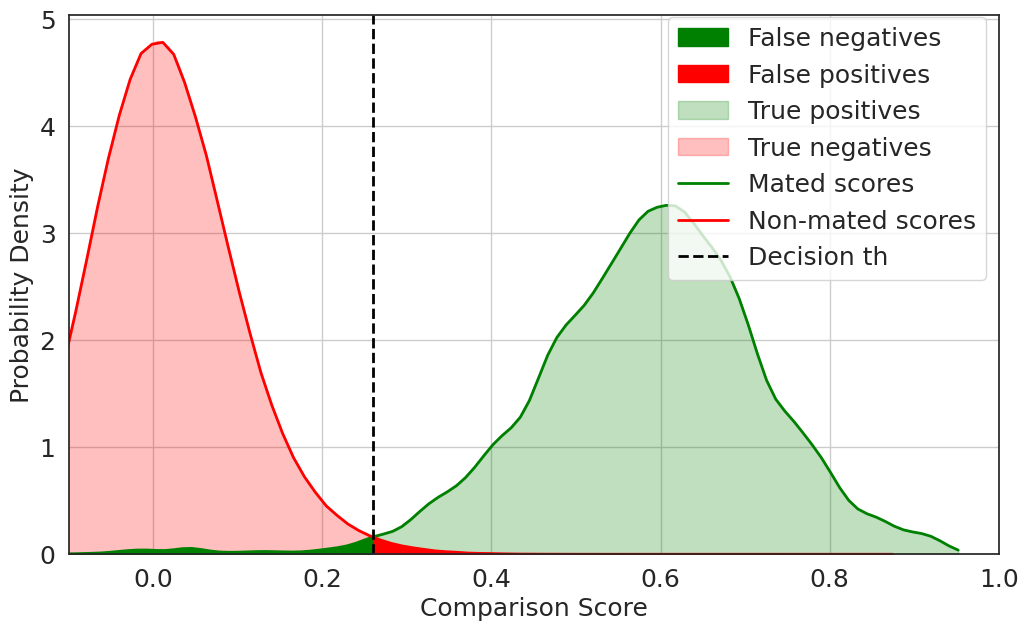

In [13]:
threshold1 = 0.26
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1)

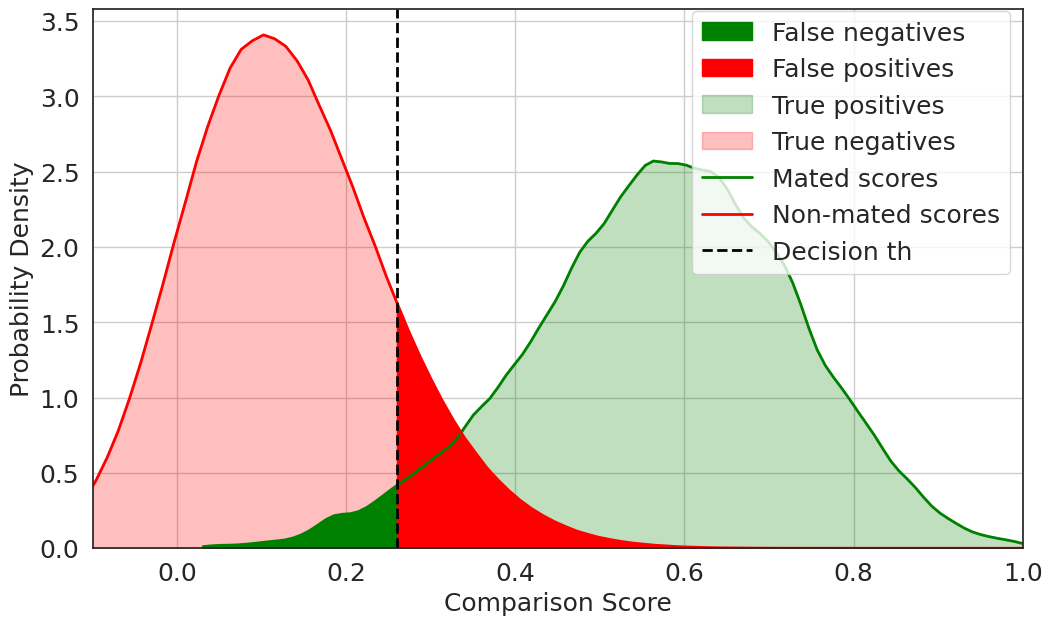

In [14]:
threshold2 = 0.26
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2)

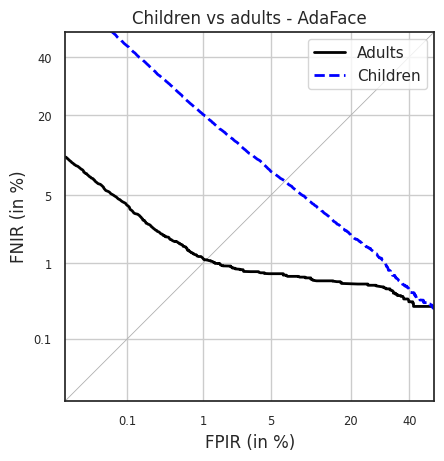

In [ ]:
system_name1 = 'Adults'
system_name2 = 'Children'

det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True, plot_title="Children vs adults - AdaFace")
det.x_limits = np.array([1e-4, .5])
det.y_limits = np.array([1e-4, .5])
det.x_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2])
det.x_ticklabels = np.array(['0.1', '1', '5', '20', '40'])
det.y_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2])
det.y_ticklabels = np.array(['0.1', '1', '5', '20', '40'])
det.create_figure()
det.plot(tar=adjust_scores_for_DET(mated_scores1, scores_type1), non=adjust_scores_for_DET(nonmated_scores1, scores_type1), label=system_name1)
det.plot(tar=adjust_scores_for_DET(mated_scores2, scores_type2), non=adjust_scores_for_DET(nonmated_scores2, scores_type2), label=system_name2)
det.legend_on(loc="upper right")
det.xticks(fontsize=tick_fontsize)
det.yticks(fontsize=tick_fontsize)
det.show()